Problem Statement 1:
 A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply.
 Dataset Information:
 The walmart.csv contains 6435 rows and 8 columns.

In [1]:
#loding all necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt

import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
#loading the dataset
df=pd.read_csv('Walmart DataSet.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05/02/2010    1643690.90             0        42.31       2.572   
1         1  12/02/2010    1641957.44             1        38.51       2.548   
2         1  19/02/2010    1611968.17             0        39.93       2.514   
3         1  26/02/2010    1409727.59             0        46.63       2.561   
4         1  05/03/2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28/09/2012     713173.95             0        64.88       3.997   
6431     45  05/10/2012     733455.07             0        64.89       3.985   
6432     45  12/10/2012     734464.36             0        54.47       4.000   
6433     45  19/10/2012     718125.53             0        56.47       3.969   
6434     45  26/10/2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
#EDA
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05/02/2010    1643690.90             0        42.31       2.572   
1      1  12/02/2010    1641957.44             1        38.51       2.548   
2      1  19/02/2010    1611968.17             0        39.93       2.514   
3      1  26/02/2010    1409727.59             0        46.63       2.561   
4      1  05/03/2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

Data Pre-processing Steps and Inspiration
The Pre-processing of the data includes the following steps:

Data Cleaning: Cleaning the data by removing missing values, outliers and other inconsistencies.
Data Exploration: Exploring the data to gain insights and understanding the data.
Data Visualization: Visualizing the data for better understanding.

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Converting 'Date' column to datetime and adding 'Year', 'Month' and 'Week' column

df["Date"] = pd.to_datetime(df["Date"])
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month 
df['Week'] =df['Date'].dt.week

In [7]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      5    17  
1  211.242170         8.106  2010     12    48  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      5    18

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [8]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month         Week  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151  2010.965035     6.475524    26.000000  
std      39.356712      1.875885     0.797019     3.321797    14.511794  
min     126.064000      3.879000  2010.000000     1.000000     1.000000  
25%     131.735000      6.891000  2010.000000     4.000000    14.000000  
50%     182.616521      7.874000  2011.000000     6.000000    26.000000  
75%     212.743293      8.622000  2012.000000     9.000000    38.000000  
max     227.232807     14.313000  2012.000000    12.000000    52.000000

In [9]:
#Checking Null

df.isnull().sum()#no null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [10]:
#Checking Duplicates

df.duplicated().sum()#no duplicates

0

In [7]:
#check month wise weekly sales as weekly sales considerd to be target
df.groupby('Month')['Weekly_Sales'].mean()#moth 1 has the highest sale

Month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [11]:
#check year wise weekly sales 
df.groupby('Year')['Weekly_Sales'].mean()

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

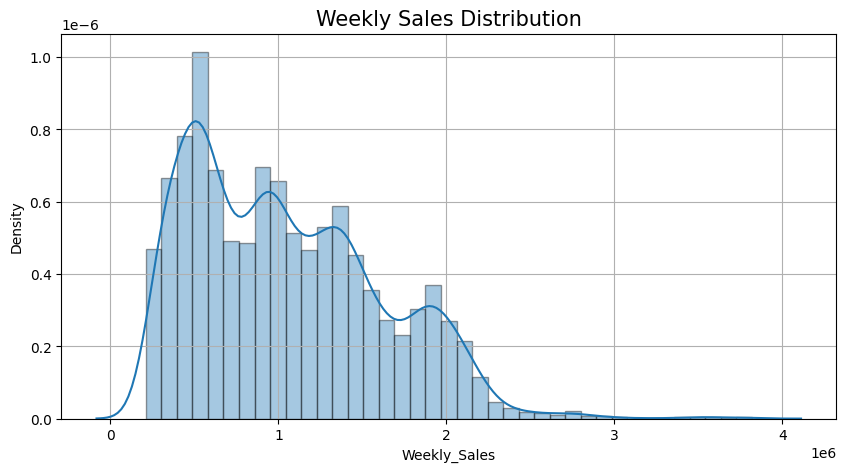

In [12]:
# Data Visualization

# Analyzing the distribution of target variable
plt.figure(figsize = (10, 5))
sns.distplot(df['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

In [ ]:
0 to first month has the highest sale

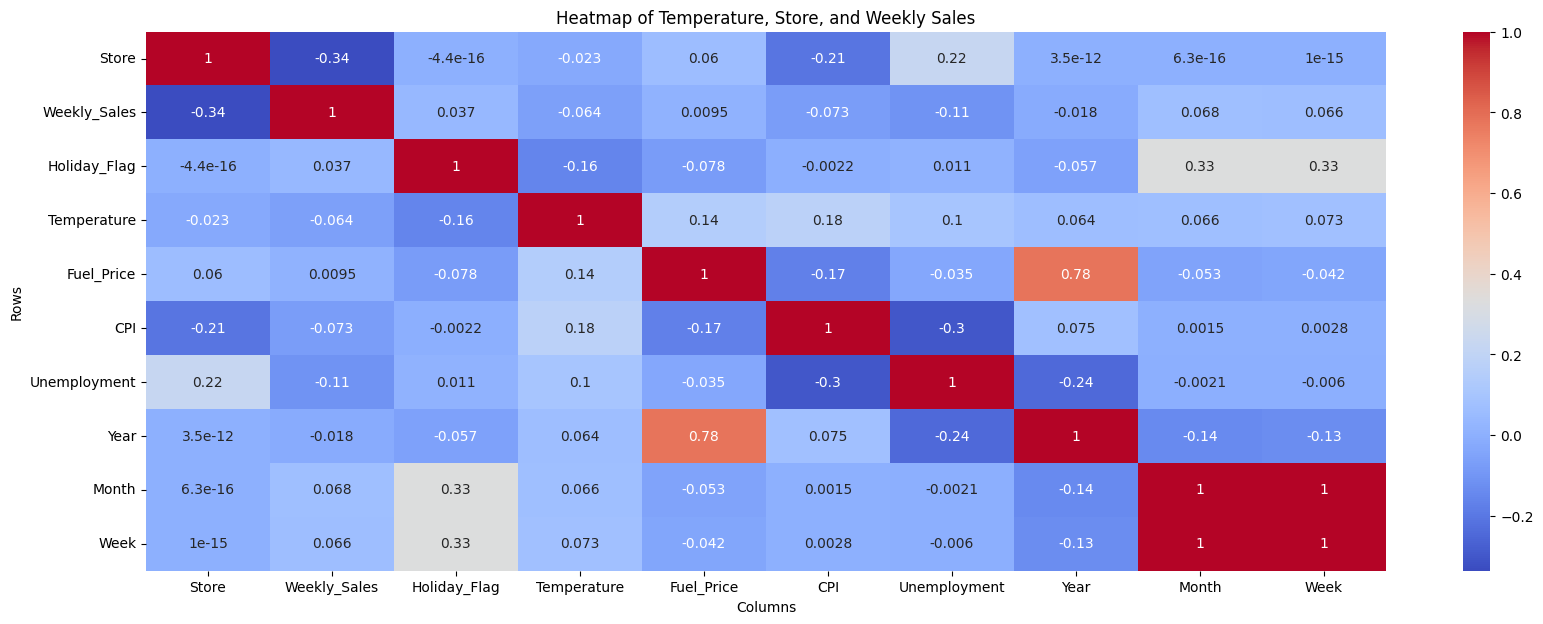

In [13]:
# Ploting  heatmap to understand the relationship between all features
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap of Temperature, Store, and Weekly Sales')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [11]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

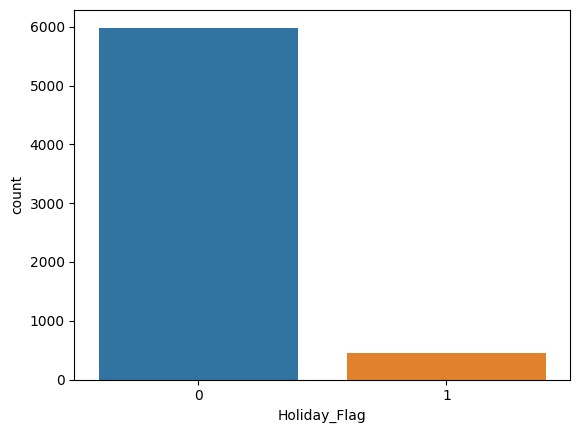

In [23]:
sns.countplot(x = 'Holiday_Flag', data =df);

weekly sales is 33% more during holidays.

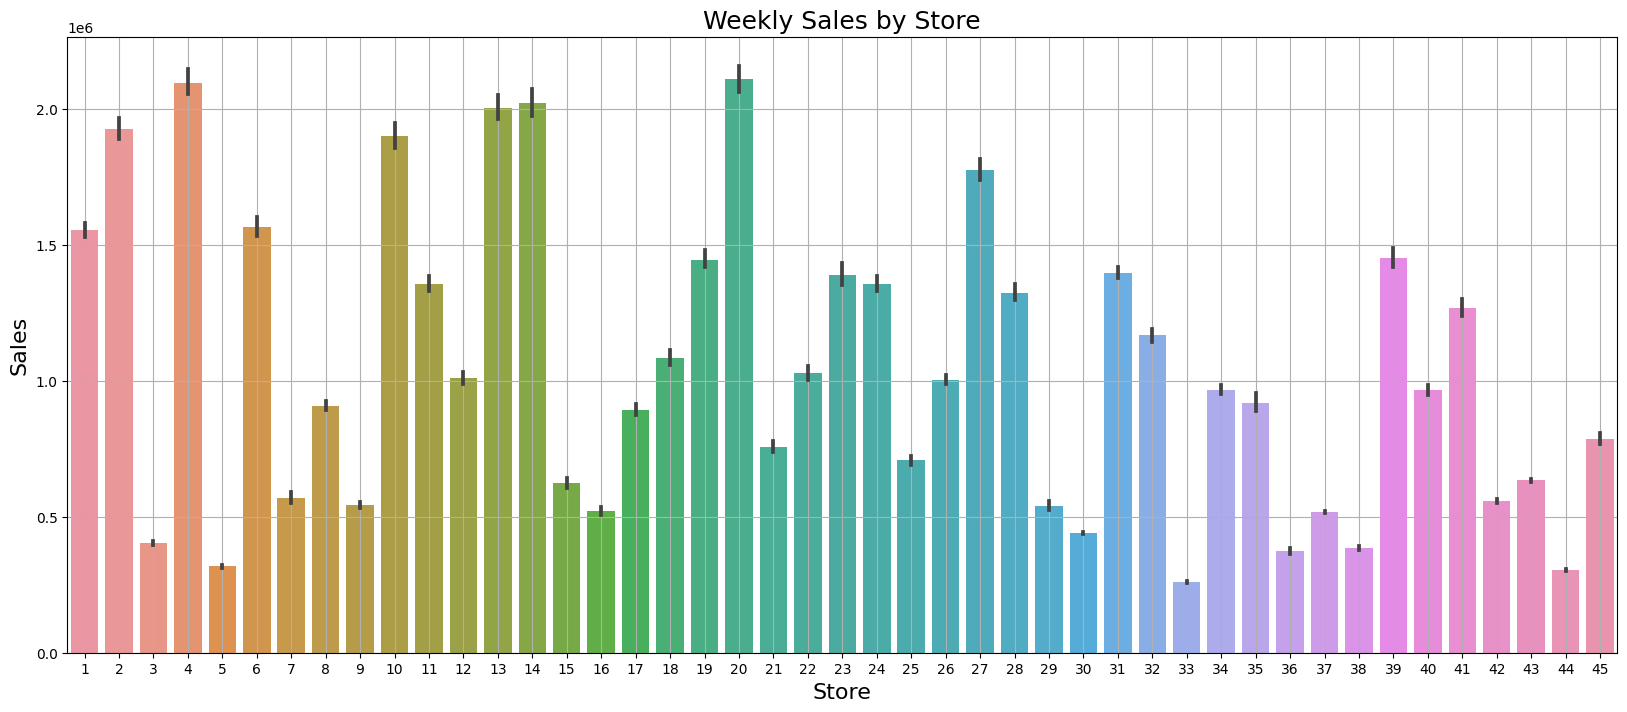

In [12]:
#store wise sales performance
plt.figure(figsize=(20,8))
sns.barplot(x=df['Store'], y=df['Weekly_Sales'])
plt.title('Weekly Sales by Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.grid()
plt.show()

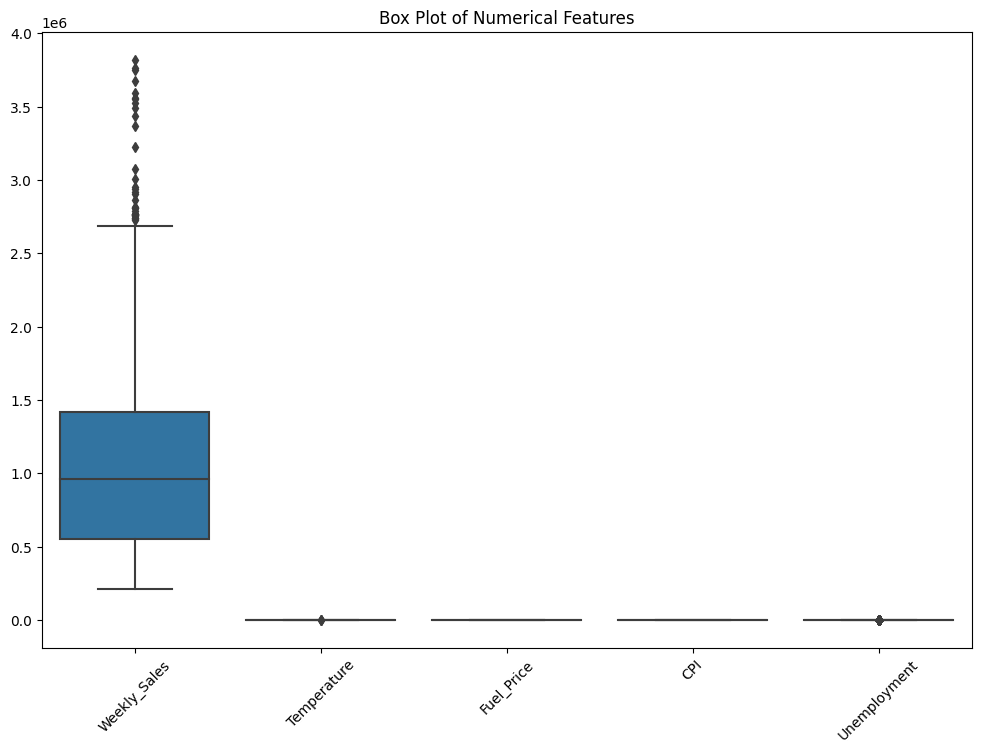

Number of outliers removed: 251


In [14]:
#checking for outliers

# Box plot for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Z-score outlier detection
from scipy import stats

numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

print("Number of outliers removed:", len(df) - len(df_no_outliers))


In [ ]:
more outliers present in weekly sales. removing outliers for inferences

 a. If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most?

In [18]:



# Calculate correlation between weekly sales and unemployment rate for each store
correlation_by_store = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().reset_index()
correlation_by_store.rename(columns={'Unemployment': 'Correlation'}, inplace=True)

# Identify stores suffering the most (highest negative correlation)
stores_suffering_most = correlation_by_store.sort_values(by='Correlation', ascending=True)['Store'].head(5)

print("Stores suffering the most due to unemployment rate:")
print(stores_suffering_most)


Stores suffering the most due to unemployment rate:
74    38
86    44
76    39
82    42
80    41
Name: Store, dtype: int64


b. If the weekly sales show a seasonal trend, when and what could be the reason?

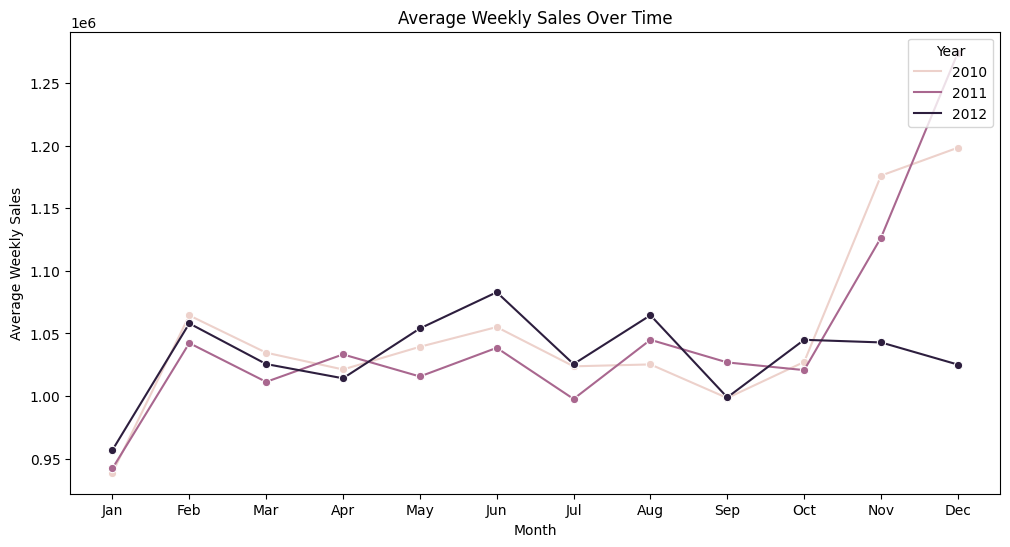

In [26]:
# Group by month and year, calculate average weekly sales
average_sales_by_month = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Plot average weekly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_sales_by_month, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.show()


sales is increasing in the beginning of every new season, reaon may be seasonal requirments

c. Does temperature affect the weekly sales in any manner?

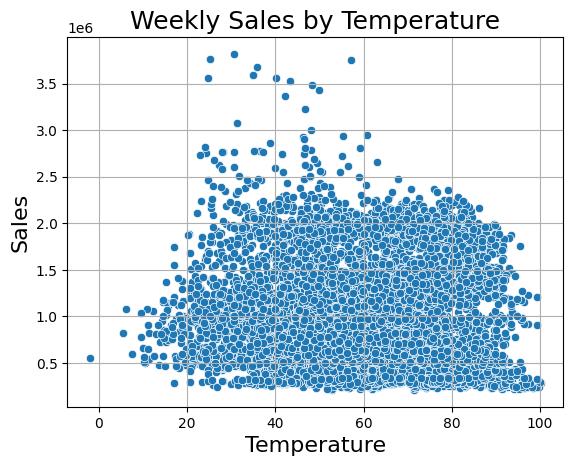

In [42]:


#plt.figure(figsize=(20,8))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'])
plt.title('Weekly Sales by Temperature', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Temperature', fontsize=16)
plt.grid()
plt.show()



In [ ]:
temperature effect is not much impacting on weekly sales

d. How is the Consumer Price index affecting the weekly sales of various stores?

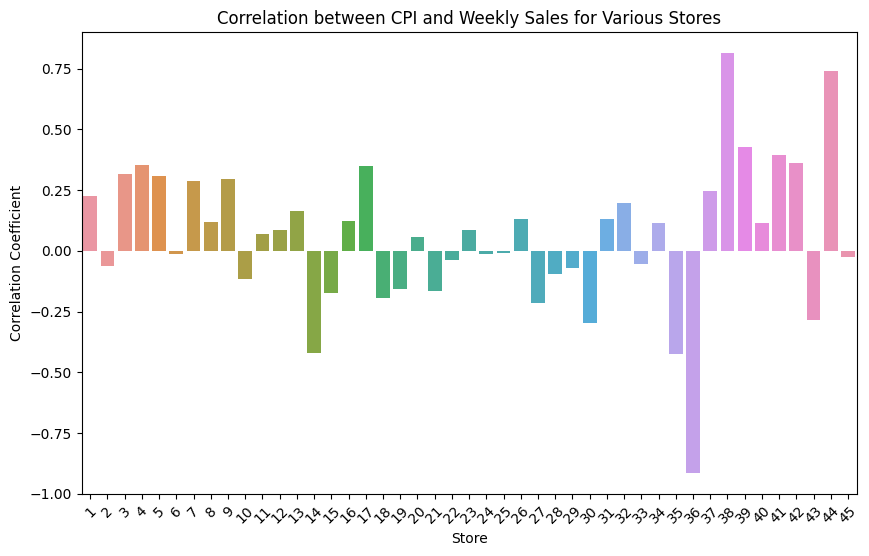

In [43]:


# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Calculate correlation coefficient between CPI and weekly sales for each store
correlation_by_store = df.groupby('Store').apply(lambda x: x['CPI'].corr(x['Weekly_Sales'])).reset_index()
correlation_by_store.columns = ['Store', 'Correlation']

# Create a bar plot for correlation
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_by_store, x='Store', y='Correlation')
plt.title('Correlation between CPI and Weekly Sales for Various Stores')
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


This bar plot will visually represent how the CPI affects the weekly sales of various stores. Positive correlation coefficients indicate a positive relationship, negative correlation coefficients indicate a negative relationship, and correlation coefficients close to zero indicate a weak or no relationship. Adjust the code based on your specific dataset and requirements.






e. Top performing stores according to the historical data.

In [44]:

# Calculate total weekly sales for each store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort stores by total sales in descending order to identify top performers
top_performing_stores = total_sales_by_store.sort_values(by='Weekly_Sales', ascending=False)

# Display top performing stores
print("Top performing stores according to historical data:")
print(top_performing_stores.head())


Top performing stores according to historical data:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08


 f.
 The worst performing store, and how significant is the difference between the
 highest and lowest performing stores.

In [45]:
import pandas as pd

# Calculate total weekly sales for each store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort stores by total sales to identify the worst performing store
worst_performing_store = total_sales_by_store.sort_values(by='Weekly_Sales').iloc[0]

# Sort stores by total sales in descending order to identify the top performing store
top_performing_store = total_sales_by_store.sort_values(by='Weekly_Sales', ascending=False).iloc[0]

# Calculate the difference in sales between the highest and lowest performing stores
difference = top_performing_store['Weekly_Sales'] - worst_performing_store['Weekly_Sales']

# Display the worst performing store and the difference in sales
print("Worst performing store:")
print(worst_performing_store)
print("\nDifference between highest and lowest performing stores:", difference)


Worst performing store:
Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64

Difference between highest and lowest performing stores: 264237570.49999997


 2. Use predictive modeling techniques to forecast the sales for each store for the next 12
 weeks

Choosing the Algorithm for the Project
The choice of algorithm for a machine learning project is depends upon the type of problem we are trying to solve.As given dataset contains target column with numeric continious data, supervised machine learning algorithems like linear regression, descion tree,random forest are implemented to check the performnce of the target variable.

In [25]:
x = df.drop(['Date','Weekly_Sales'], axis=1)
x

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0         1             0        42.31       2.572  211.096358         8.106   
1         1             1        38.51       2.548  211.242170         8.106   
2         1             0        39.93       2.514  211.289143         8.106   
3         1             0        46.63       2.561  211.319643         8.106   
4         1             0        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45             0        64.88       3.997  192.013558         8.684   
6431     45             0        64.89       3.985  192.170412         8.667   
6432     45             0        54.47       4.000  192.327265         8.667   
6433     45             0        56.47       3.969  192.330854         8.667   
6434     45             0        58.85       3.882  192.308899         8.667   

      Year  Month  Week  
0     2010      5    17  
1     2010     12    48  
2     2010      2     7  
3     2010      2     8  
4     2010      5    18  
...    ...    ...   ...  
6430  2012      9    39  
6431  2012      5    19  
6432  2012     12    50  
6433  2012     10    42  
6434  2012     10    43  

[6435 rows x 9 columns]

In [28]:
y = df['Weekly_Sales']


Linear Regression:

Accuracy: 14.19999083701825
Mean Absolute Error: 424642.5977344035
Mean Squared Error: 263163468924.7224
Root Mean Squared Error: 512994.60906009766


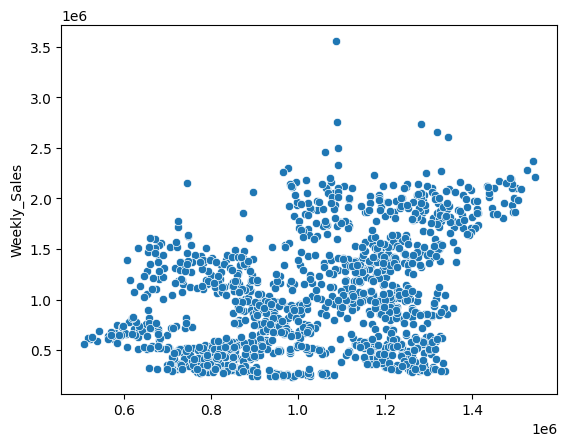

In [44]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(x=Y_pred, y=Y_test)

import warnings
warnings.filterwarnings('ignore')

In [46]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x, y)

RandomForestRegressor()

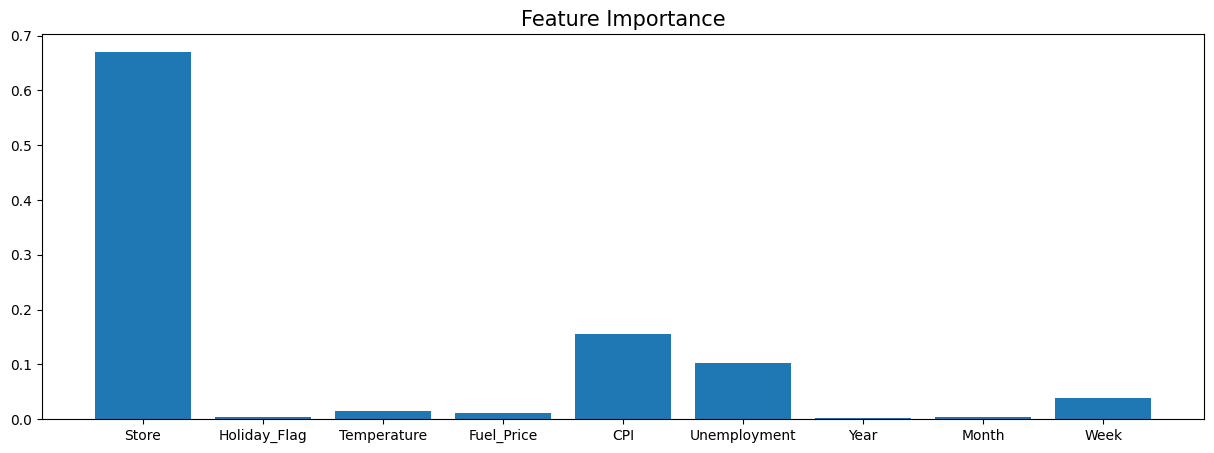

In [47]:
# checking the feature importance

plt.figure(figsize = (15, 5))
plt.bar(x.columns, rf.feature_importances_)
plt.title("Feature Importance", fontsize = 15)
plt.show()

In [ ]:
otherthan store operations little bit CPI, unemployment and week parameters are impacting on sales

Random Forest Regressor:

Accuracy: 95.36331569180375
Mean Absolute Error: 67698.66993372182
Mean Squared Error: 14452750724.585634
Root Mean Squared Error: 120219.59376318668


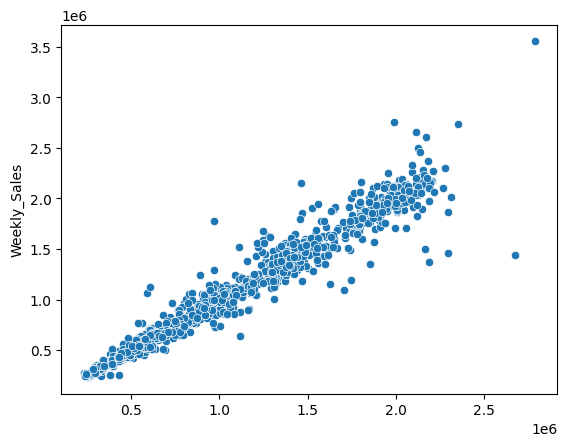

In [48]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(x=Y_pred, y=Y_test)


import warnings
warnings.filterwarnings('ignore')

Here, Linear Regression is not an appropriate model to use which is clear from it's low accuracy. However, Random Forest Regression gives accuracy of over 95% , so, it is the best model to forecast demand.

In [ ]:
References:internet